In [4]:
# Importing necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model  # Corrected here
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# Loading the dataset & output path
original_dataset_path = '/Users/faheemjinna/Downloads/ML Project/Dataset_Disease'
output_path = '/Users/faheemjinna/Downloads/ML Project/output'

In [6]:
# List of crops to be used in classification
selected_crops = [
    "Apple__black_rot", 
    "Apple__healthy", 
    "Apple__rust", 
    "Apple__scab",
    "Cassava__bacterial_blight", 
    "Cassava__brown_streak_disease", 
    "Cassava__green_mottle",
    "Cassava__healthy", 
    "Cassava__mosaic_disease",
    "Grape__black_measles", 
    "Grape__black_rot", 
    "Grape__healthy", 
    "Grape__leaf_blight_(isariopsis_leaf_spot)",
    "Potato__early_blight", 
    "Potato__healthy", 
    "Potato__late_blight",
    "Rice__brown_spot", 
    "Rice__healthy", 
    "Rice__hispa", 
    "Rice__leaf_blast", 
    "Rice__neck_blast",
    "Sugarcane__bacterial_blight", 
    "Sugarcane__healthy", 
    "Sugarcane__red_stripe", 
    "Sugarcane__rust",
    "Tea__algal_leaf", 
    "Tea__anthracnose", 
    "Tea__bird_eye_spot", 
    "Tea__brown_blight",
    "Tea__healthy", 
    "Tea__red_leaf_spot",
    "Wheat__brown_rust", 
    "Wheat__healthy", 
    "Wheat__septoria", 
    "Wheat__yellow_rust"
]

In [7]:
# Defining split ratios for train, validation, and test datasets in the ratio of 80:10:10
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Creating directories for data splits
splits = ['train', 'val', 'test']

for split in splits:
    split_path = os.path.join(output_path, split)
    os.makedirs(split_path, exist_ok=True)

In [8]:
# Shuffling and spliting the dataset
for crop in selected_crops:
    crop_path = os.path.join(original_dataset_path, crop)
    if not os.path.isdir(crop_path):
        print(f"Warning: {crop_path} does not exist.")
        continue

    images = os.listdir(crop_path)
    random.shuffle(images)

    # Calculating split sizes
    train_size = int(len(images) * train_ratio)
    val_size = int(len(images) * val_ratio)

    # Creating train, validation, and test splits
    train_imgs = images[:train_size]
    val_imgs = images[train_size:train_size + val_size]
    test_imgs = images[train_size + val_size:]

    def copy_images(img_list, split):
        """Copies images to the corresponding train/val/test directories."""
        split_crop_path = os.path.join(output_path, split, crop)
        os.makedirs(split_crop_path, exist_ok=True)
        for img in img_list:
            src = os.path.join(crop_path, img)
            dest = os.path.join(split_crop_path, img)
            shutil.copy(src, dest)

    # Copying images to their respective directories
    copy_images(train_imgs, 'train')
    copy_images(val_imgs, 'val')
    copy_images(test_imgs, 'test')

print("Dataset splitting complete!")

Dataset splitting complete!


In [9]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale validation and test datasets
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Paths to the split datasets
train_path = os.path.join(output_path, 'train')
val_path = os.path.join(output_path, 'val')
test_path = os.path.join(output_path, 'test')

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

Found 31499 images belonging to 35 classes.
Found 6216 images belonging to 35 classes.
Found 6279 images belonging to 35 classes.


/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 3059s 3s/step - accuracy: 0.3312 - loss: 6.1694 - val_accuracy: 0.3489 - val_loss: 3.0199
Epoch 2/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 1976s 2s/step - accuracy: 0.3682 - loss: 2.4461 - val_accuracy: 0.3961 - val_loss: 2.2481
Epoch 3/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 1965s 2s/step - accuracy: 0.3658 - loss: 2.2635 - val_accuracy: 0.3489 - val_loss: 2.9570
Epoch 4/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 1965s 2s/step - accuracy: 0.3669 - loss: 2.2357 - val_accuracy: 0.3486 - val_loss: 4.1350
Epoch 5/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 1934s 2s/step - accuracy: 0.3621 - loss: 2.2646 - val_accuracy: 0.3958 - val_loss: 2.1175
Epoch 6/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 956s 968ms/step - accuracy: 0.3668 - loss: 2.2079 - val_accuracy: 0.4123 - val_loss: 1.9908
Epoch 7/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 791s 803ms/step - accuracy: 0.3763 - loss: 2.1787 - val_accuracy: 0.4286 - val_loss: 1.9900
Epoch 8/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 770s 781ms/step - accuracy: 0.3778 - loss: 2.1

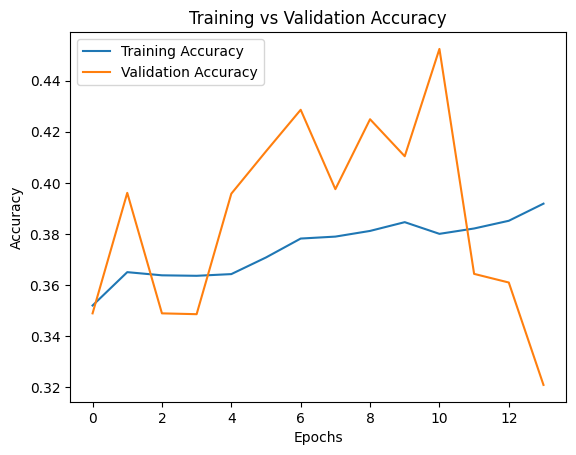

In [10]:
# Building an enhanced CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Model Checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Training the model
history = model.fit(
    train_generator, epochs=20, validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()